In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nd import LNN

%matplotlib inline

In [5]:
ks = np.array([4, 3, 2, 1])
N_max = 1000
sigmaP = 1
sigmaC = 1
s = 1

In [6]:
colors = ['#377eb8', '#ff7f00', '#4daf4a',
          '#f781bf', '#a65628', '#984ea3',
          '#999999', '#e41a1c', '#dede00']

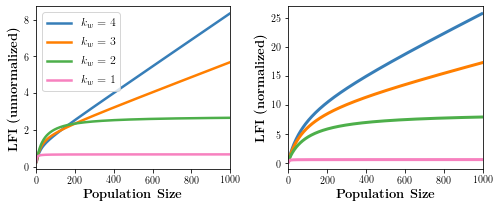

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

# iterate over diversity values
for k_idx, k in enumerate(ks):
    Ns = np.arange(k, N_max, k)
    data = np.zeros(Ns.shape)
    # iterate over population sizes
    for N_idx, N in enumerate(Ns):
        # w = LNN.struct_weight_maker_const_mod(N, k)
        w = LNN.struct_weight_maker(N, k)    
        lnn = LNN(
            v=np.ones(N), w=w,
            sigmaP=sigmaP, sigmaC=sigmaC,
            nonlinearity='squared')
        data[N_idx] = lnn.FI_nonlinear_stage(s)
        
    axes[0].plot(Ns, data,
                 color=colors[k_idx],
                 linewidth=2.5,
                 label=r'$k_w=%s$' %k)
    
# iterate over diversity values
for k_idx, k in enumerate(ks):
    Ns = np.arange(k, N_max, k)
    data = np.zeros(Ns.shape)
    # iterate over population sizes
    for N_idx, N in enumerate(Ns):
        w = LNN.struct_weight_maker_const_mod(N, k)
        # w = LNN.struct_weight_maker(N, k)    
        lnn = LNN(
            v=np.ones(N), w=w,
            sigmaP=sigmaP, sigmaC=sigmaC,
            nonlinearity='squared')
        data[N_idx] = lnn.FI_nonlinear_stage(s)
        
    axes[1].plot(Ns, data,
                 color=colors[k_idx],
                 linewidth=3,
                 label=r'$k_w=%s' %k)
    
for ax in axes:
    ax.set_xlim([0, 1000])
    ax.set_xlabel(r'\textbf{Population Size}', fontsize=13)
    
axes[0].set_ylabel(r'\textbf{LFI (unnormalized)}', fontsize=13)
axes[1].set_ylabel(r'\textbf{LFI (normalized)}', fontsize=13)

axes[0].legend(loc=2, prop={'size': 12})
plt.subplots_adjust(wspace=0.3)
plt.savefig('normalize_weights.pdf', bbox_inches='tight')